In [1]:
import csv
import os
import json
import codecs
import re
import pandas as pd
import xlrd

In [2]:
data = pd.read_excel('allFB.xlsx')

In [3]:
data

,image url,image caption,posted by,post date,post time,like,sad,love,haha,wow,anger,comment,share,location
0,https://www.facebook.com/photo.php?fbid=223813...,#WeWantSafeRoad #Bangladesh #Dhaka #AirportRo...,https://www.facebook.com/jhs.shuvo.9,2018-08-05,02:08:00,4,0,0,0,0,0,0,0,NaN
1,https://www.facebook.com/noakhaliplus/photos/p...,#WeWantSafeRoad #Bangladesh #Dhaka #AirportRo...,https://www.facebook.com/noakhaliplus/,2018-08-04,13:53:00,7,0,0,0,0,0,0,0,NaN
2,https://www.facebook.com/bdnewsplus/photos/p.2...,NaN,https://www.facebook.com/bdnewsplus/,2018-08-05,12:39:00,0,0,0,0,0,0,0,0,NaN
3,https://www.facebook.com/photo.php?fbid=185861...,ছাত্রদের ৯ দফা দাবি👭👭👭👭 #Bangladesh #WeWantJu...,https://www.facebook.com/md.jakaria.50,2018-08-03,12:37:00,91,0,3,0,0,0,1,16,NaN
4,https://www.facebook.com/bdnewsplus/photos/p.2...,পাকিস্তানী হানাদারদের শুধু পোষাকটা এত চকচকে ছ...,https://www.facebook.com/bdnewsplus/,2018-08-06,16:38:00,1,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,https://www.facebook.com/photo.php?fbid=242163...,"জেগে উঠো বাংলাদেশ,এখনই সময়। #WeWantJustice #W...",https://www.facebook.com/ishant.anjum,2018-08-06,11:03:00,10,0,2,0,0,0,1,0,NaN
2249,https://www.facebook.com/photo.php?fbid=205729...,NaN,https://www.facebook.com/mrtonmoy,2018-08-07,17:51:00,1,0,0,0,0,0,0,0,NaN
2250,https://www.facebook.com/photo.php?fbid=205729...,NaN,https://www.facebook.com/mrtonmoy,2018-08-07,17:51:00,9,0,2,0,0,0,0,0,NaN
2251,https://www.facebook.com/photo.php?fbid=205729...,NaN,https://www.facebook.com/mrtonmoy,2018-08-07,17:51:00,2,0,3,0,0,0,0,0,NaN


In [4]:
data['image caption'].fillna('0',inplace = True)

In [5]:
txt_lst = list(data['image caption'])

In [6]:
import numpy as np
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [12]:
for i in range(len(txt_lst)):
    try:
        for j in range(len(txt_lst[i])):
            if (ord(txt_lst[i][j]) >127):
                txt_lst[i] = txt_lst[i].replace(txt_lst[i][j],'')
    except:
        continue

In [13]:
txt_lst

[' #WeWantSafeRoad #Bangladesh #Dhaka #AirportRoadAccident #WeWantJustice #RoadSafe #StepDownShahjahan #SheikhHasina #Movement4Justic... #BBC #CNN #AlJazeera #Reuters #AP #AFP #DailyMail #Telegraph #TRTWorld #SaudiGazette #AlArabiya #EuroNews #SkyNews #FoxNews #CTN #NDTV #CGTN',
 ' #WeWantSafeRoad #Bangladesh #Dhaka #AirportRoadAccident #WeWantJustice... #RoadSafe #ShaJahanMustGo #SheikhHasina #QuotaReformProtest #Movement4Justice',
 '0',
 '     #Bangladesh #WeWantJustice #AirportRoadAccident ',
 '                 ... #WeWantSafeRoad #Bangladesh #Dhaka #AirportRoadAccident #WeWantJustice... #RoadSafe #StepDownShahjahan #SheikhHasina #Movement4Justic #BBC #CNN #AlJazeera #Reuters #AP #AFP #DailyMail #Telegraph #TRTWorld #SaudiGazette #AlArabiya #EuroNews #SkyNews #FoxNews',
 '                      ... #WeWantSafeRoad #Bangladesh #Dhaka #AirportRoadAccident #WeWantJustice #RoadSafe #StepDownShahjahan #SheikhHasina #Movement4Justic #BBC #CNN #AlJazeera #Reuters #AP #AFP #DailyMail #Telegr

In [7]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[' #WeWantSafeRoad #Bangladesh #Dhaka #AirportRoadAccident #WeWantJustice #RoadSafe #StepDownShahjahan #SheikhHasina #Movement4Justic... #BBC #CNN #AlJazeera #Reuters #AP #AFP #DailyMail #Telegraph #TRTWorld #SaudiGazette #AlArabiya #EuroNews #SkyNews #FoxNews #CTN #NDTV #CGTN',
 ' #WeWantSafeRoad #Bangladesh #Dhaka #AirportRoadAccident #WeWantJustice... #RoadSafe #ShaJahanMustGo #SheikhHasina #QuotaReformProtest #Movement4Justice',
 nan,
 '     #Bangladesh #WeWantJustice #AirportRoadAccident ',
 '                 ... #WeWantSafeRoad #Bangladesh #Dhaka #AirportRoadAccident #WeWantJustice... #RoadSafe #StepDownShahjahan #SheikhHasina #Movement4Justic #BBC #CNN #AlJazeera #Reuters #AP #AFP #DailyMail #Telegraph #TRTWorld #SaudiGazette #AlArabiya #EuroNews #SkyNews #FoxNews',
 '                      ... #WeWantSafeRoad #Bangladesh #Dhaka #AirportRoadAccident #WeWantJustice #RoadSafe #StepDownShahjahan #SheikhHasina #Movement4Justic #BBC #CNN #AlJazeera #Reuters #AP #AFP #DailyMail #Telegr

In [14]:
new_data = []

for i in range (len(txt_lst)):
    clean_tweet = re.match('(.*?)http.*?\s?(.*?)', txt_lst[i])
    if clean_tweet:
        new_tweet = ''+clean_tweet.group(1) + clean_tweet.group(2)
        
        new_data.append(new_tweet)
    else:
        new_data.append(txt_lst[i])

txt_lst = new_data

In [15]:
data['text'] = txt_lst

In [18]:
data['post date'] = pd.to_datetime(data['post date'])

data = data.sort_values('post date')

In [19]:
data.index = list(np.arange(len(data)))

In [20]:
txt_lst = [re.sub('\S*@\S*\s?', '', sent) for sent in txt_lst]

# Remove new line characters
txt_lst = [re.sub('\s+', ' ', sent) for sent in txt_lst]

# Remove distracting single quotes
txt_lst = [re.sub("\'", "", sent) for sent in txt_lst]

pprint(txt_lst[:1])

[' #WeWantSafeRoad #Bangladesh #Dhaka #AirportRoadAccident #WeWantJustice '
 '#RoadSafe #StepDownShahjahan #SheikhHasina #Movement4Justic... #BBC #CNN '
 '#AlJazeera #Reuters #AP #AFP #DailyMail #Telegraph #TRTWorld #SaudiGazette '
 '#AlArabiya #EuroNews #SkyNews #FoxNews #CTN #NDTV #CGTN']


In [21]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(txt_lst))

print(data_words[:1])


[['wewantsaferoad', 'bangladesh', 'dhaka', 'wewantjustice', 'roadsafe', 'sheikhhasina', 'movement', 'justic', 'bbc', 'cnn', 'aljazeera', 'reuters', 'ap', 'afp', 'dailymail', 'telegraph', 'trtworld', 'saudigazette', 'alarabiya', 'euronews', 'skynews', 'foxnews', 'ctn', 'ndtv', 'cgtn']]


In [22]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['wewantsaferoad', 'bangladesh', 'dhaka', 'wewantjustice', 'roadsafe_sheikhhasina_movement_justic', 'bbc_cnn_aljazeera_reuters', 'ap_afp_dailymail_telegraph', 'trtworld_saudigazette_alarabiya_euronews', 'skynews_foxnews', 'ctn', 'ndtv', 'cgtn']


In [29]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

In [8]:
data = []
with open('C:\\Users\\16101106\\Desktop\\student\\data_lem.txt', "r") as output:
    data.append(output.read())

data = data[0].split('\n')

data = [data[i].split(',') for i in range(len(data))]

In [11]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]]


In [12]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [13]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.000*"tour" + 0.000*"urge" + 0.000*"skynew" + 0.000*"strong" + '
  '0.000*"telegraph" + 0.000*"theguardian" + 0.000*"thesun" + 0.000*"selfie" + '
  '0.000*"viral" + 0.000*"justiceforall"'),
 (1,
  '0.000*"tour" + 0.000*"urge" + 0.000*"skynew" + 0.000*"strong" + '
  '0.000*"telegraph" + 0.000*"theguardian" + 0.000*"thesun" + 0.000*"selfie" + '
  '0.000*"viral" + 0.000*"justiceforall"'),
 (2,
  '0.123*"go" + 0.082*"make" + 0.067*"people" + 0.055*"change" + 0.042*"never" '
  '+ 0.040*"be" + 0.031*"safe" + 0.030*"current" + 0.024*"wrong" + '
  '0.021*"journalist"'),
 (3,
  '0.799*"wewantjustice" + 0.099*"wewantsaferoad" + '
  '0.003*"roadsafe_sheikhhasina" + 0.003*"movement_justic" + '
  '0.002*"dailymail_telegraph" + 0.001*"alarabiya_euronews" + '
  '0.001*"aljazeera_reuter" + 0.001*"trtworld_saudigazette" + '
  '0.001*"skynews_foxnew" + 0.000*"wewantsafety"'),
 (4,
  '0.120*"get" + 0.060*"place" + 0.029*"freeshahidul" + 0.027*"see" + '
  '0.023*"minister" + 0.021*"sit" + 0.004*"

In [14]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -16.921990969183053

Coherence Score:  0.5617318079281508


In [23]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

E:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


TypeError: Object of type 'complex' is not JSON serializable

PreparedData(topic_coordinates=                        x                   y  topics  cluster       Freq
topic                                                                    
3     -0.375168+0.000000j -0.315926+0.000000j       1        1  21.553844
8     -0.378663+0.000000j  0.312738+0.000000j       2        1  19.402617
12    -0.023127+0.000000j  0.001542+0.000000j       3        1  15.226226
2      0.029260+0.000000j  0.000949+0.000000j       4        1  10.554261
16    -0.039280+0.000000j  0.001445+0.000000j       5        1   7.631804
17     0.048058+0.000000j  0.000488+0.000000j       6        1   6.953329
4      0.056090+0.000000j  0.000231+0.000000j       7        1   5.892594
11     0.056047+0.000000j  0.000199+0.000000j       8        1   3.536783
13     0.054298+0.000000j -0.000057+0.000000j       9        1   2.847638
18     0.053368+0.000000j -0.000102+0.000000j      10        1   1.663677
7      0.053241+0.000000j -0.000105+0.000000j      11        1   1.542987
5      

In [16]:
import os

In [17]:
os.environ['MALLET_HOME'] = 'C:\\mallet'

mallet_path = 'C:\\mallet\\bin\\mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [18]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(9,
  [('country', 0.04926108374384237),
   ('government', 0.04926108374384237),
   ('safety', 0.04433497536945813),
   ('demand', 0.04187192118226601),
   ('kill', 0.03940886699507389),
   ('police', 0.03694581280788178),
   ('hope', 0.03201970443349754),
   ('minister', 0.029556650246305417),
   ('people', 0.022167487684729065),
   ('city', 0.019704433497536946)]),
 (18,
  [('student', 0.21888412017167383),
   ('road', 0.11802575107296137),
   ('picture', 0.02575107296137339),
   ('medium', 0.023605150214592276),
   ('news', 0.02145922746781116),
   ('violence', 0.02145922746781116),
   ('beat', 0.019313304721030045),
   ('license', 0.015021459227467811),
   ('bangla', 0.015021459227467811),
   ('driver', 0.015021459227467811)]),
 (5,
  [('make', 0.12538226299694188),
   ('safe', 0.07951070336391437),
   ('time', 0.0581039755351682),
   ('stand', 0.04281345565749235),
   ('people', 0.04281345565749235),
   ('democracy', 0.03669724770642202),
   ('change', 0.027522935779816515),
   (

In [19]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [20]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

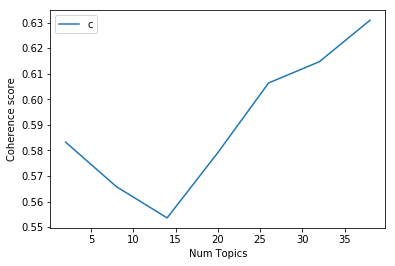

In [21]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [22]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5832
Num Topics = 8  has Coherence Value of 0.5658
Num Topics = 14  has Coherence Value of 0.5536
Num Topics = 20  has Coherence Value of 0.5791
Num Topics = 26  has Coherence Value of 0.6064
Num Topics = 32  has Coherence Value of 0.6147
Num Topics = 38  has Coherence Value of 0.6309


In [24]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.147*"bangladesh" + 0.074*"justice" + 0.072*"country" + 0.030*"work" + '
  '0.026*"proud" + 0.019*"studentpower" + 0.019*"page" + 0.019*"real" + '
  '0.016*"bring" + 0.016*"teen"'),
 (1,
  '0.307*"bangladesh" + 0.133*"dhaka" + 0.096*"studentprotest" + '
  '0.076*"roadsafety" + 0.011*"bbcworld" + 0.011*"uttara" + 0.009*"send" + '
  '0.009*"shajahanmustgo" + 0.009*"roadsafe" + 0.009*"roadaccident"'),
 (2,
  '0.048*"change" + 0.043*"solidarity" + 0.033*"august" + 0.026*"exhibition" + '
  '0.026*"end" + 0.026*"collect" + 0.024*"wrong" + 0.024*"journalist" + '
  '0.021*"feel" + 0.021*"struggle"'),
 (3,
  '0.143*"student" + 0.082*"road" + 0.040*"safe" + 0.025*"safety" + '
  '0.024*"demand" + 0.022*"government" + 0.021*"news" + 0.018*"kill" + '
  '0.015*"medium" + 0.015*"spread"'),
 (4,
  '0.653*"error" + 0.019*"continue" + 0.011*"sheikh" + 0.011*"journalism" + '
  '0.008*"freespeech" + 0.008*"regard" + 0.005*"sheikhhasina_movement" + '
  '0.005*"everyday" + 0.005*"responsible" + 0.0

In [25]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic

ValueError: Wrong number of items passed 14, placement implies 2253

In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

In [ ]:
df_dominant_topic.to_excel('F:\Python\Alvi\dominant.xlsx')

In [ ]:
sent_topics_sorteddf_mallet.to_excel('F:\Python\Alvi\sent_topics_sorteddf_mallet.xlsx')